In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato.csv


# Veri Hazırlığı

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [51]:
df=pd.read_csv('/kaggle/input/zomato.csv')

In [52]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


> **Veri setinden ilk 5 satırı çağrıldı.. head() default 5 değeri ile gelir..**

In [53]:
# Sütun isimlerini özel bir dict kullanarak yeniden adlandırma
df.rename(columns={
    'approx_cost(for two people)': 'cost',
    'listed_in(type)': 'type',  
    'listed_in(city)': 'city'  
}, inplace=True)

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


> **Bazı sütun isimleri düzensiz olarak geldi. Modelleme aşamasında bir sıkıntı yaşama ihtimaline karşı isimleri yeniden adlandırıldı.**

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           51717 non-null  object
 1   address       51717 non-null  object
 2   name          51717 non-null  object
 3   online_order  51717 non-null  object
 4   book_table    51717 non-null  object
 5   rate          43942 non-null  object
 6   votes         51717 non-null  int64 
 7   phone         50509 non-null  object
 8   location      51696 non-null  object
 9   rest_type     51490 non-null  object
 10  dish_liked    23639 non-null  object
 11  cuisines      51672 non-null  object
 12  cost          51371 non-null  object
 13  reviews_list  51717 non-null  object
 14  menu_item     51717 non-null  object
 15  type          51717 non-null  object
 16  city          51717 non-null  object
dtypes: int64(1), object(16)
memory usage: 6.7+ MB


> **df.info() komutu ile veri çerçevesinin genel yapısı incelendi. Eksik değer sayıları, sütun isimleri, veri tipleri vb.**

In [55]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


> **Sayısal veri türündeki sütunlar için özet istatistikler hesaplandı.**

In [56]:
df.describe(include='object').T

,count,unique,top,freq
url,51717,51717,https://www.zomato.com/bangalore/jalsa-banasha...,1
address,51717,11495,Delivery Only,128
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
rate,43942,64,NEW,2208
phone,50509,14926,080 43334321,216
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182


> **Object veri türündeki sütunlar için özet istatistikler hesaplandı.**

In [57]:
# Gereksiz ve tekrar eden sütunları belirleme
columns_to_drop = [ 'url', 'phone']

#name: Modelleme için genellikle kullanılmaz.
#url: Modelleme için gereksizdir.

# Sütunları veri çerçevesinden çıkarma
df = df.drop(columns=columns_to_drop)

df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


> **Bir restoranın telefonu ve url adresi mantıken onun modelleme sürecindeki başarısına etki etmeyeceği için veri setinden kaldırıldı..**

In [58]:
df.shape

(51717, 15)

> **Veri setinin boyutuna genel bakış --> 51717 satır, 15 sütun..**

In [59]:
missing_values = df.isnull().sum()

In [60]:
missing_values_percent = (missing_values  / len(df)) * 100
print(missing_values_percent)

address          0.000000
name             0.000000
online_order     0.000000
book_table       0.000000
rate            15.033741
votes            0.000000
location         0.040606
rest_type        0.438927
dish_liked      54.291626
cuisines         0.087012
cost             0.669026
reviews_list     0.000000
menu_item        0.000000
type             0.000000
city             0.000000
dtype: float64


> **Bu noktada veri setinde null olan değerler bulundu. Bu değerler veri modelleme aşaması için sorun olabilecek değerler ve birçok farklı bakış açısıyla ele alınmalılar..**

In [61]:
# 'dish_liked' sütununu DataFrame'den çıkarma
df.drop(['dish_liked'], axis=1, inplace=True)

df.head()


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [62]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

> **Date için benzersiz değerler saydırıldığında '-', 'NEW' gibi puan statüsüne uygun olmayan veriler göze çarpıyor. Bunların ele alınması lazım..**

In [63]:
# Örnek rate sütunu
df['rate'] = df['rate'].astype(str)  # rate sütununu string'e dönüştürme

# 'NEW' veya 'nan' değerlerini None olarak işaretleme
df['rate'] = df['rate'].replace(['NEW', 'nan'], None)
df = df.loc[df.rate !='-'].reset_index(drop=True)

# '3.8/5' formatından sadece sayıyı çekmek için '/' öncesini alma
df['rate'] = df['rate'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else x)

# Sayısal değerlere dönüştürme
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

df['rate'].head()


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

> **NEW': Bu değer genellikle bir restoranın henüz bir değerlendirmesi olmadığı anlamına gelir. Modelleme ve analizde bu tür veriler genellikle anlamlı değildir. Bu yüzden None ile değiştirildi. '-': Bu değer genellikle eksik veya geçersiz bir değerlendirmeyi temsil eder. Bu yüzden bu değerler de temizlendi ve DataFrame'den çıkarıldı. Ve '/' ifadesi rate sütunumuzu object olarak gösterdiği için öncesindeki sayısal değer alınıp numeric bir değere dönüştürüldü. Bu da modelleme sürecinde istenilen şekilde kullanılmasını sağlayacaktır..**

In [64]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51648 entries, 0 to 51647
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       51648 non-null  object 
 1   name          51648 non-null  object 
 2   online_order  51648 non-null  object 
 3   book_table    51648 non-null  object 
 4   rate          41665 non-null  float64
 5   votes         51648 non-null  int64  
 6   location      51627 non-null  object 
 7   rest_type     51421 non-null  object 
 8   cuisines      51603 non-null  object 
 9   cost          51306 non-null  object 
 10  reviews_list  51648 non-null  object 
 11  menu_item     51648 non-null  object 
 12  type          51648 non-null  object 
 13  city          51648 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.5+ MB


> **Ve burada rate sütununun veri tipinin float64'e döndüğü görülüyor.**

In [66]:
# Boş değerleri olan satırları kaldırma
df = df.dropna(subset=['rate'])
df= df.dropna(subset=['location'])
df = df.dropna(subset=['cuisines'])
df= df.dropna(subset=['rest_type'])

print(df[['rate','location', 'cuisines', 'rest_type']].isnull().sum())



rate         0
location     0
cuisines     0
rest_type    0
dtype: int64


> **Nan değerlere Bakış açısı: nan değerler sayısal ise median, mean ile metinsel, string değerler ise mode ile doldurulabilir. Ya da bu değerler direkt veri setinden çıkarılabilir. Bu  durum eksik değerlerin modelleme aşamasına etkisine göre değişir. Bu nedenle tüm yöntemler denendi ve en başarılı sonuç bu değerlerin çıkarılmasıyla elde edildi. Bu nedenle bu durumla devam edildi..**

In [67]:
#benzersiz cost değerlerini kontrol etme
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800', nan,
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

>  **Cost sütununa bakınca, cost sütunundaki veriler sayısal olarak işlenemiyor çünkü bazı değerler sayısal olmayan formatta ('800', '2,000' gibi). Zaten dtype karşılığında object olarak görülüyordu. Bunun da nedeni bu sayede unique ile görülmüş oldu. Bu veriler de oncelikle orijinal sayısal değerlerine dönüştürüldü. Modelleme aşamasında bu önemli bir nokta.**

In [68]:
# Virgülleri kaldırıp sayısal formata dönüştürme
df['cost'] = df['cost'].str.replace(',', '').astype(float)

df = df.dropna(subset=['cost'])
print(df['cost'].isnull().sum())


0


> **Bu kod yapısında da cost sütununun object tipine dönüşmesini sağlayan '' ifadesi kaldırılıp sayısal değerlerimiz numeric tipe dönüştürüldü. Ve sonrasında eksik değerler kaldırıldı.**

In [69]:
missing_values = df.isnull().sum()
missing_values_percent = (missing_values  / len(df)) * 100
print(missing_values_percent)

address         0.0
name            0.0
online_order    0.0
book_table      0.0
rate            0.0
votes           0.0
location        0.0
rest_type       0.0
cuisines        0.0
cost            0.0
reviews_list    0.0
menu_item       0.0
type            0.0
city            0.0
dtype: float64


> **Nan değerlerin sayısı yeniden yazdırıldı. Görüldüğü üzere nan değerlerimiz ortadan kalkmış durumda.**

In [70]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [71]:
#sayısal olmayan değerleri encode ederek sayısal formata dönüştürme
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())
df_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


> **Daha sonra, modelleme sürecinde sayısal olmayan tüm veriler sayısal değerlere dönüştürüldü, çünkü makine öğrenimi modelleri, verilerin sayısal formatta olmasını gerektirir.**

In [72]:
# Local Outlier Factor (LOF) modelini oluşturma
lof_model =  LocalOutlierFactor(n_neighbors=30, contamination=0.15)

# Modeli eğitme ve aykırı değerleri tespit etme
outlier_preds = lof_model.fit_predict(df_en)

# Aykırı değerlerin indekslerini alma
outlier_indices = np.where(outlier_preds == -1)[0]

# Aykırı değerlerin yüzdesini hesaplama
outlier_percentage = (len(outlier_indices) / len(df_en)) * 100


> **Bu kod bloğunda ise Local Outlier Factor (LOF) algoritması kullanarak veri setindeki aykırı değerleri tespit edildi ve aykırı değerlerin yüzdesini hesaplandı.. Bu bölümde supervised yönteminden ayrı bir yöntem olarak LOF Kullanılmıştır. LOF denetimsiz bir yöntemdir. Bu aşamada denetimsiz modellerle çalışıldığı için bu algoritma tercih edilmiştir..**

In [73]:
# Aykırı değerleri ayrı bir veri çerçevesine atama
#outliers_data = df_en.iloc[outlier_indices]

# Ana veri setinden aykırı değerleri çıkarma
#df_en_clean = df_en.drop(index=outlier_indices)


> **Veriyi temizledikten sonra bu tarz indeks hatası alınabilmektedir. Bu nedenle indeksleri sıfırlamak gerekebilir.**

In [74]:
# İndeksleri sıfırlama
df_en = df_en.reset_index(drop=True)


> **Bu sıfırlama sayesinde indeks hataları ve uyumsuzlukları çözülmüş olur. Bu genellikle veriyi temizleme veya yeniden düzenleme işlemlerinden sonra düzenli bir indeks yapısına kavuşmak için kullanılır.**

In [75]:
# Aykırı değerleri ayrı bir veri çerçevesine atama
outliers_data = df_en.iloc[outlier_indices]

# Ana veri setinden aykırı değerleri çıkarma
df_en_clean = df_en.drop(index=outlier_indices)

> **Aykırı değerler bir veri çerçevesine atanıp veri setinden çıkarmak tercih ediliyor..**

In [76]:
# Temizlenmiş veri setinde aykırı değer kalıp kalmadığını kontrol etme v1
print(f"Tüm aykırılıkların veri setindeki yüzdesi: {outlier_percentage:.2f}%")
print(f"Temizlenmiş veri setinde kalan verilerin yüzdesi: {(len(df_en_clean) / len(df_en)) * 100:.2f}%")

Tüm aykırılıkların veri setindeki yüzdesi: 15.00%
Temizlenmiş veri setinde kalan verilerin yüzdesi: 85.00%


> **Aykırı değer oranınımıza ve aykırı değer çıkarıldıktan sonra kalan verilere bakıldığında başarılı bir aykırı değer çıkarma işlemi yapıldığı görülmektedir..**

In [77]:
# Temizlenmiş veri setinde aykırı değer kalıp kalmadığını kontrol etme v2
if df_en_clean.isin(outliers_data).any().any():
    print("Temizlenmiş veri setinde hala aykırı değerler bulunmaktadır.")
else:
    print("Temizlenmiş veri setinde aykırı değer bulunmamaktadır.")


Temizlenmiş veri setinde aykırı değer bulunmamaktadır.


> **Burada da aykırı değerlerin çıkarıldığı teyit edilmektedir..**

In [78]:
# StandardScaler'ı başlatma
scaler = StandardScaler()

# Ölçeklenmesi gereken sütunların listesi
columns_to_scale = df_en_clean.columns

# Temizlenmiş veri kümesini kopyalama
df_en_clean_scaled = df_en_clean.copy()

# Ölçekleyiciyi veri kümesindeki gerekli sütunlara uygulama
df_en_clean_scaled[columns_to_scale] = scaler.fit_transform(df_en_clean[columns_to_scale])

df_en_clean_scaled.head()


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,-1.639630,-1.433481,-0.721811,-2.468904,0.952447,0.570579,-1.439196,-0.646026,-0.871728,0.507172,-1.390019,-0.496911,-2.419421,-1.825252
1,-1.639170,-1.432876,-0.721811,0.405038,0.952447,0.585471,-1.439196,-0.646026,-0.869944,0.507172,-1.389857,-0.496911,-2.419421,-1.825252
2,-1.638709,-1.432270,-0.721811,0.405038,0.260952,0.748037,-1.439196,-0.563491,-0.868160,0.507172,-1.389695,-0.496911,-2.419421,-1.825252
4,-1.637787,-1.431059,1.385404,0.405038,0.260952,-0.185168,-1.389666,-0.646026,-0.864591,0.045235,-1.389371,-0.496911,-2.419421,-1.825252
5,-1.637327,-1.430453,-0.721811,0.405038,0.260952,-0.036252,-1.389666,-0.646026,-0.862807,0.045235,-1.389209,-0.496911,-2.419421,-1.825252


> **Kümeleme algoritmaları, veri noktalarının birbirine olan uzaklıklarına göre kümeler oluşturduğundan, ölçeklendirilmiş veriler daha doğru kümeler oluşturulmasına yardımcı olur.. Verilerimiz bu nedenle Standardizasyon işleminden geçirildi.**

In [79]:
# t-SNE ile boyut azaltma
tsne = TSNE(n_components=2, perplexity=300, n_iter=250, learning_rate=20, random_state=42)

# TSNE dönüşümünü gerçekleştirme
df_en_tsne = tsne.fit_transform(df_en_clean_scaled)

# DataFrame oluşturma ve sütun isimlerini belirleme
df_tsne = pd.DataFrame(df_en_tsne, columns= ['tsne1', 'tsne2'])

print(df_tsne.head())


      tsne1     tsne2
0  0.758401  1.361531
1 -1.569894 -0.145314
2 -1.575006 -0.146370
3  1.408096 -0.217472
4 -1.583816 -0.150044


> **Boyutsal azaltma, veri setindeki gereksiz veya gürültülü bilgileri ortadan kaldırır ve kümeleme algoritmalarını daha verimli hale getirir. Çünkü çok boyutlu verilerle çalışmaktansa bizim için gerekli bir veri kümesi oluşturmuş olur bu da modelleme sürecimizi optimize etmek için özellikle çok boyutlu verilerde kullanılması gerekli bir adımdır. Bu amaçla kümele aşamasına geçmeden önce bu aşama uygulandı. Burada  çok bilinen yöntemlerden pca ve tsne denendi ve tsne modeli çok daha başarılı hale getirdiği için bu teknik ile devam edildi..**

#  Veri Analizi

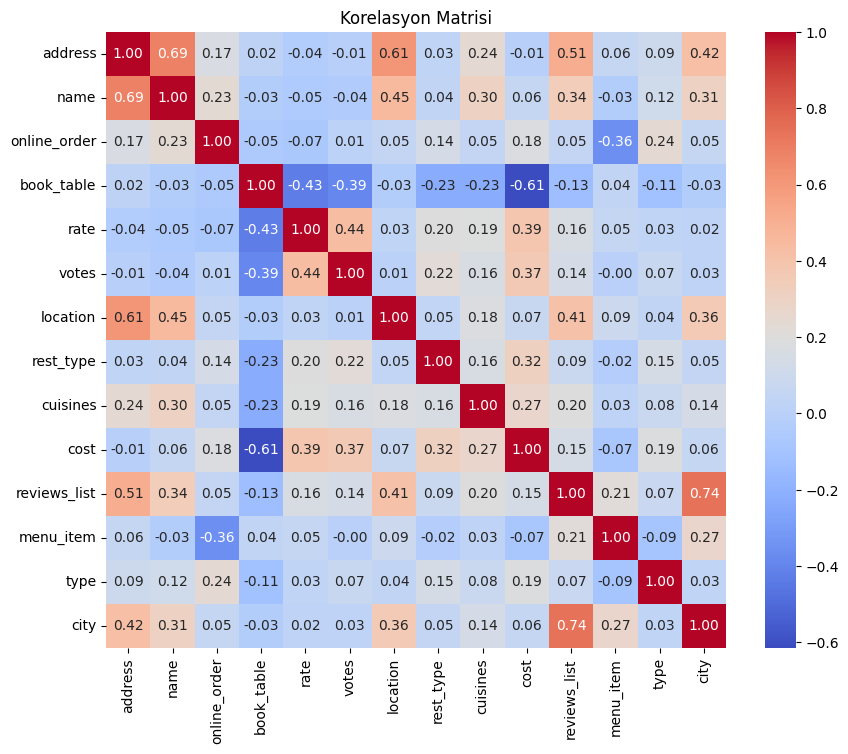

In [80]:
# Korelasyon matrisini oluşturma
correlation_matrix = df_en.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

> **Korelasyon analizi ile veriler arasındaki ilişkiler incelendi. Hangi sütunlar arasında güçlü bağlantılar olduğu incelendi.**

In [81]:
df_en.describe(include='all')


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
count,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000
mean,3602.188425,2423.833943,0.343189,0.847224,3.702011,352.683179,29.328406,8.035940,503.263238,603.914063,8650.286552,1064.459855,2.806946,14.483169
std,2194.744361,1682.920671,0.474780,0.359776,0.439985,884.177761,20.307903,12.453704,576.938581,464.942973,6237.536238,2125.367114,1.170420,7.989769
min,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,2071.000000,1006.000000,0.000000,1.000000,3.400000,21.000000,14.000000,2.000000,53.000000,300.000000,3133.000000,0.000000,2.000000,7.000000
50%,3434.000000,2151.000000,0.000000,1.000000,3.700000,73.000000,24.000000,2.000000,253.000000,500.000000,7400.000000,0.000000,2.000000,15.000000
75%,5134.000000,3490.000000,1.000000,1.000000,4.000000,277.000000,39.000000,9.000000,847.000000,750.000000,14110.500000,550.000000,4.000000,20.000000
max,8791.000000,6601.000000,1.000000,1.000000,4.900000,16832.000000,91.000000,86.000000,2366.000000,6000.000000,21102.000000,8242.000000,6.000000,29.000000


> **Tüm sütunları için özet istatistikler görüntülendi.**

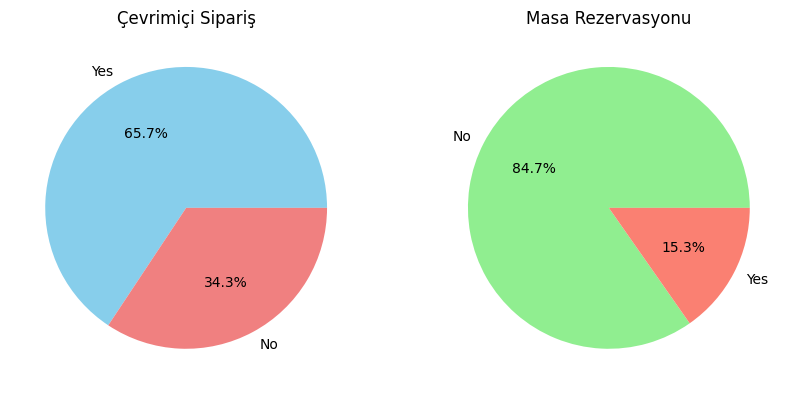

In [82]:
# 'online_order' sütunu için pasta grafiği
online_order_counts = df['online_order'].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(online_order_counts, labels=online_order_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Çevrimiçi Sipariş')

# 'book_table' sütunu için pasta grafiği
book_table_counts = df['book_table'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(book_table_counts, labels=book_table_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Masa Rezervasyonu')

plt.show()


> **Çevrim içi sipariş olup olmama durumuna bakmak için 'online_order' sütununa özel pasta grafiği çizdirildi.**

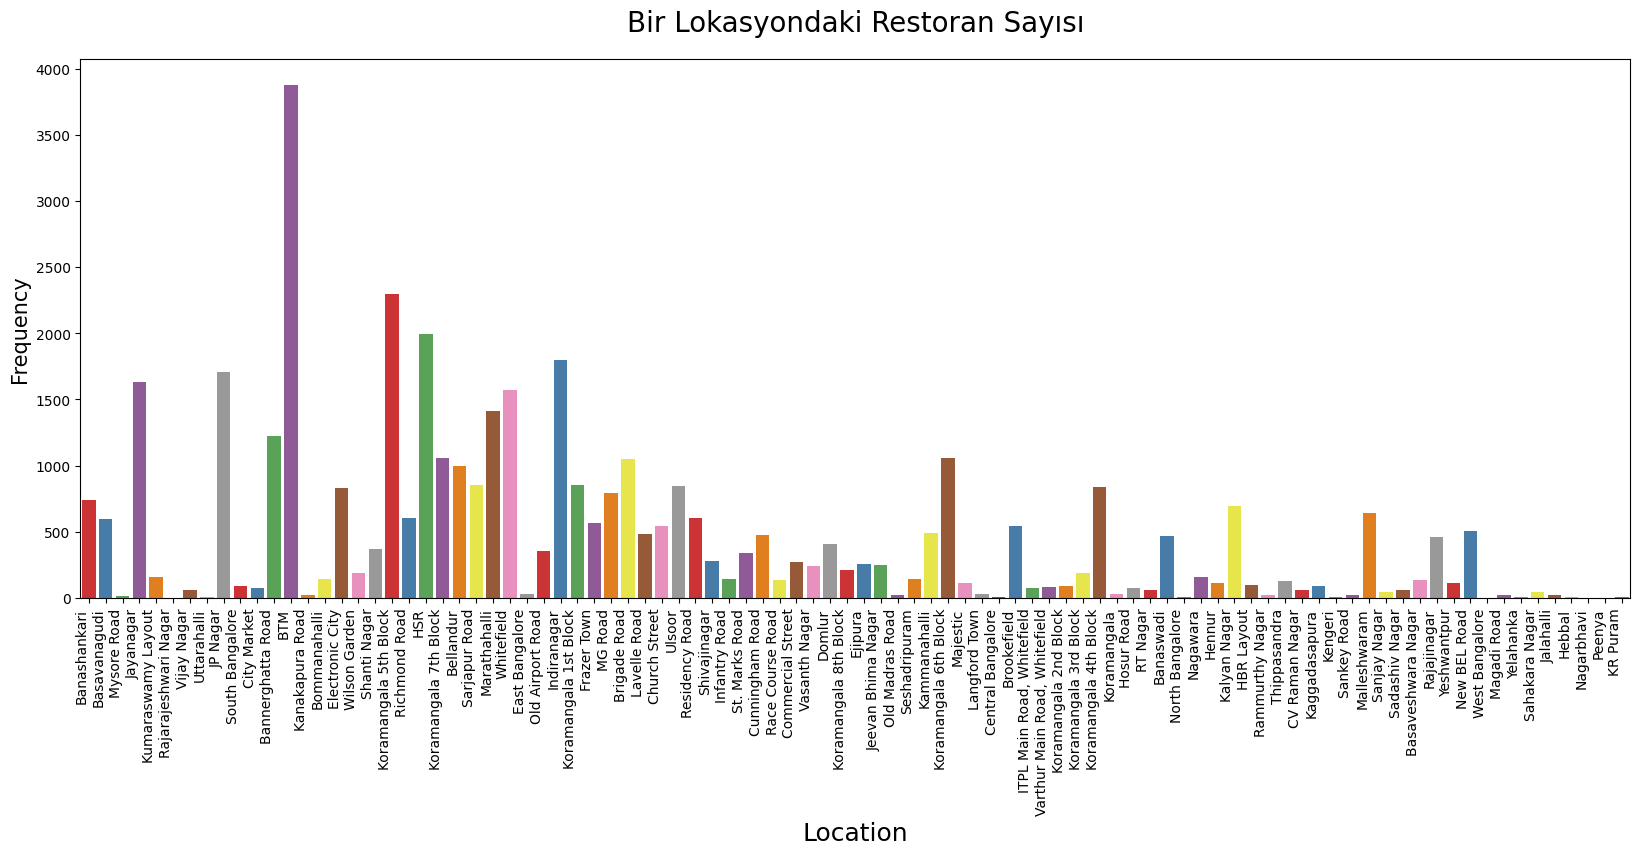

In [83]:
plt.figure(figsize=(20, 7))

# Seaborn countplot oluşturma
loc = sns.countplot(x="location", data=df, palette="Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")

plt.ylabel("Frequency", size=15)
plt.xlabel("Location", size=18)
plt.title('Bir Lokasyondaki Restoran Sayısı', size=20, pad=20)

plt.show()

> **'location' sütunu ele alınarak tüm lokasyonlardaki restoran sıklığına bakıldı.. En fazla restoran BTM lokasyonunda görülmektedir.**

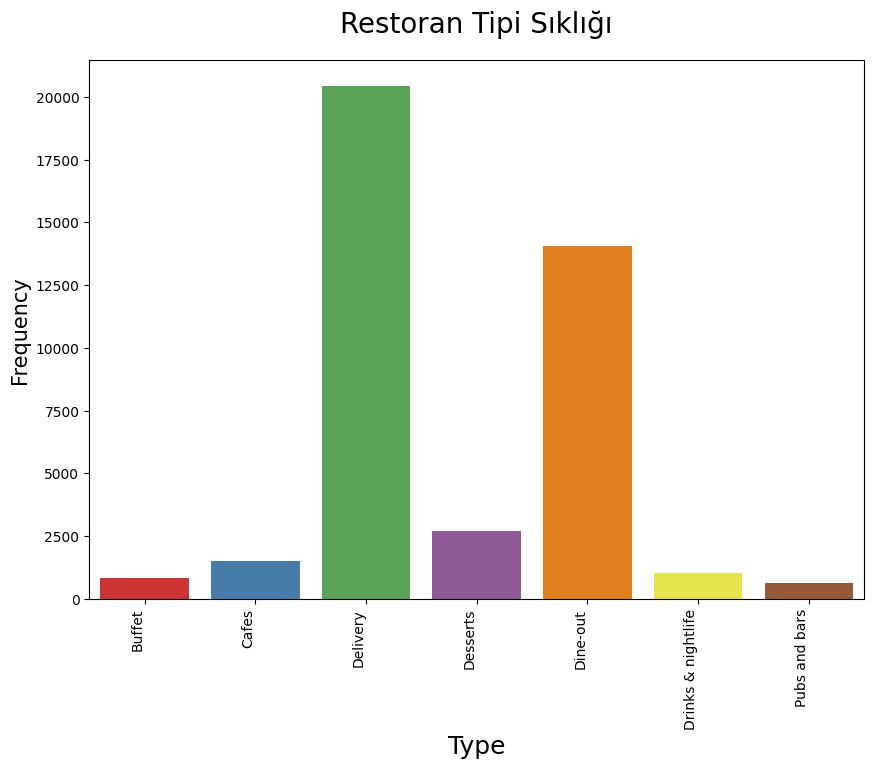

In [84]:
plt.figure(figsize=(10, 7))

# Seaborn countplot oluşturma
loc = sns.countplot(x="type", data=df, palette="Set1")

loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")

plt.ylabel("Frequency", size=15)
plt.xlabel("Type", size=18)
plt.title('Restoran Tipi Sıklığı', size=20, pad=20)


plt.show()

> **'type' sütunu ele alınarak tüm lokasyonlardaki restoran tipi sıklığına bakıldı.. En çok delivery en az pubs and bars tipi görülmektedir.**

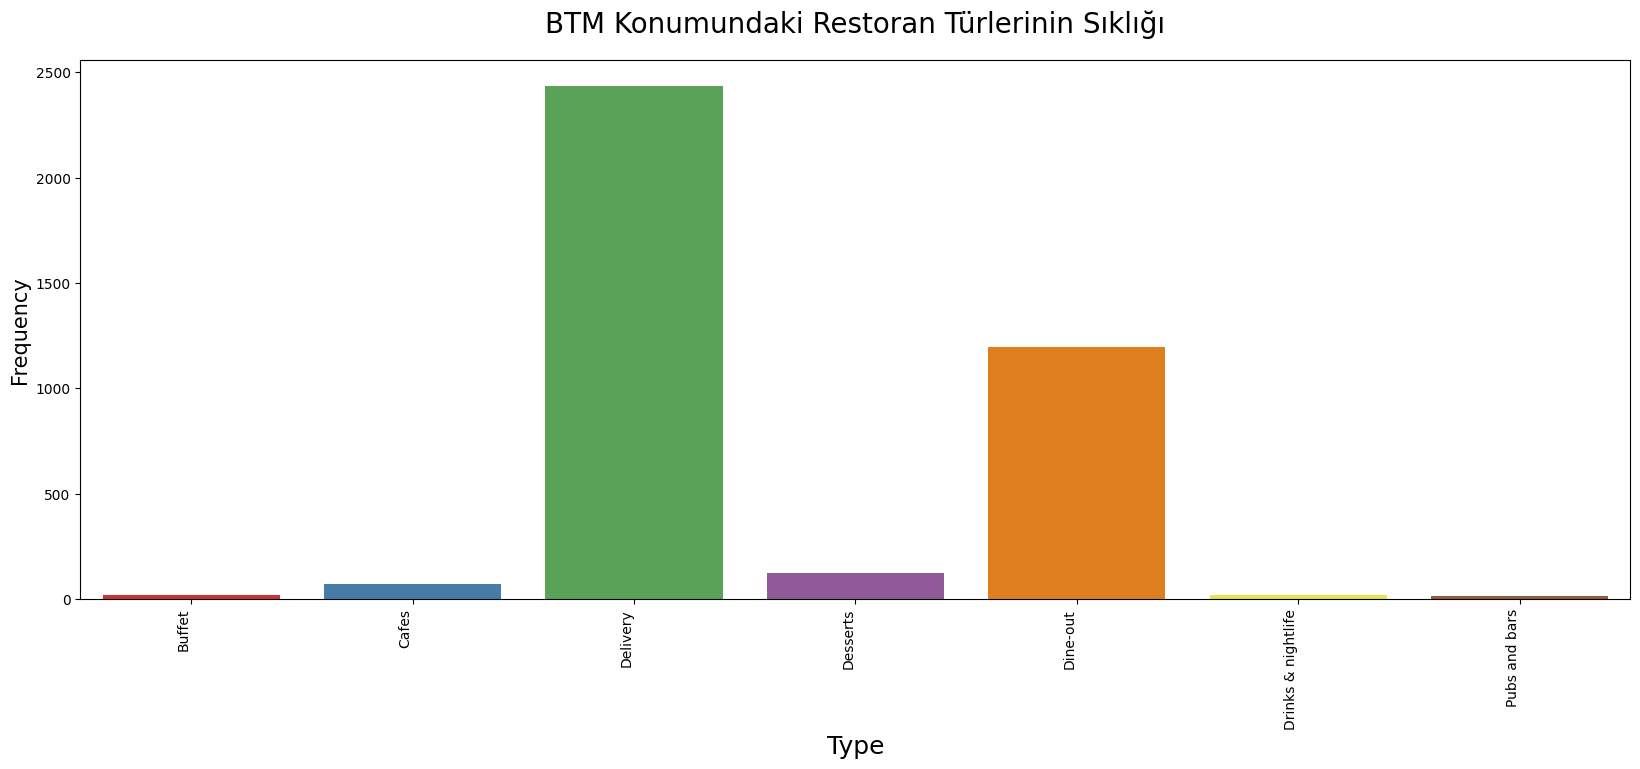

In [85]:
# "BTM" konumundaki verileri filtreleme
btm_data = df[df['location'] == 'BTM']

plt.figure(figsize=(20, 7))

# Seaborn countplot oluşturma
sns.countplot(x="type", data=btm_data, palette="Set1")

plt.xticks(rotation=90, ha="right")

plt.ylabel("Frequency", size=15)
plt.xlabel("Type", size=18)
plt.title('BTM Konumundaki Restoran Türlerinin Sıklığı', size=20, pad=20)

plt.show()


> **En çok restoran sayısına sahip BTM lokasyonu ele alınarak bu lokasyondaki restoran tipi sıklığına bakıldı. En çok delivery tipi görülürken buffet,Drinks & nightlife, pubs and bars türleri çok az görülmektedir.**

# Modelleme

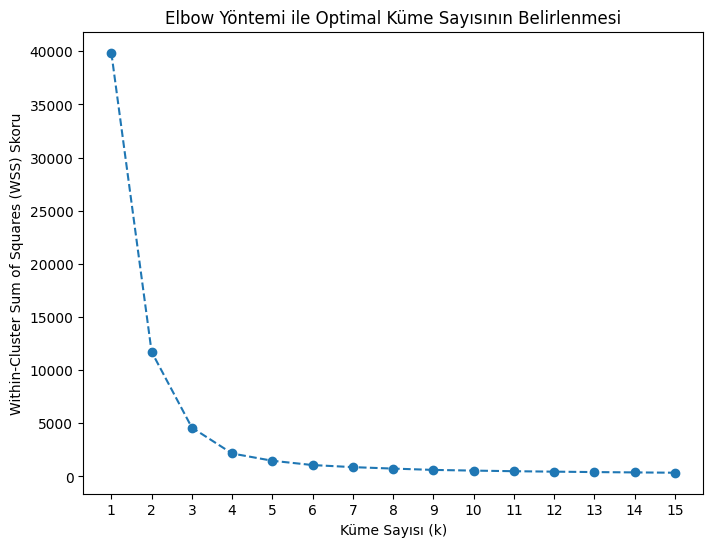

In [86]:
# Elbow yöntemiyle uygun küme sayısını belirleme işlevi
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax + 1):
        kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)  # parametreleri belirleme
        kmeans.fit(points)
        sse.append(kmeans.inertia_)  # k-means modelinin inertia değeri WSS skoru olarak kaydedilmektedir..
    return sse

# PCA dönüşümlü veri setini kullanarak WSS skorlarını hesaplama
kmax = 15  # Denenecek maksimum küme sayısını ifade etmektedir..
wss_scores = calculate_WSS(df_tsne, kmax)

# Elbow grafiği çizdirme
plt.figure(figsize=(8, 6))
plt.plot(range(1, kmax + 1), wss_scores, marker='o', linestyle='--')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS) Skoru')
plt.title('Elbow Yöntemi ile Optimal Küme Sayısının Belirlenmesi')
plt.xticks(range(1, kmax + 1))
plt.show()

> **Kümeleme geçmeden önce optimal küme sayısının bulunması, modelin performansını artırarak veri setinin en anlamlı ve etkili şekilde bölünmesini sağlar. Bu adım, verinin doğru şekilde gruplandırılmasını ve her bir kümenin homojenliğini sağlayarak analizin doğruluğunu ve anlamlılığını artırır.. Elbow (dirsek)  yöntemi de, kümeleme analizi için optimal küme sayısını belirlemenin yaygın bir yöntemidir. Bu nedenle Elbow yöntemini kullanarak en uygun küme sayısını belirlemek için veri kümesinin WSS değerleri hesaplandı.**

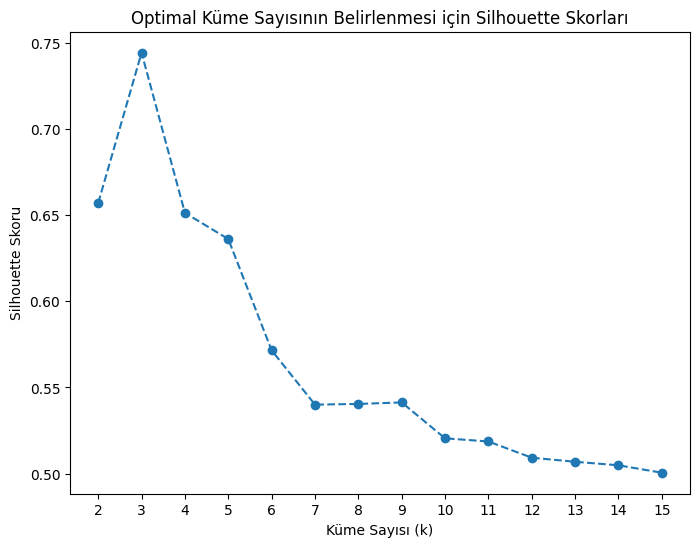

In [87]:
sil_scores = []

# Küme sayısı için döngü
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
    kmeans.fit(df_tsne)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_tsne, labels, metric='euclidean')
    sil_scores.append(silhouette_avg)

# Silhouette skorlarını görselleştirme
plt.figure(figsize=(8, 6))
plt.plot(range(2, kmax + 1), sil_scores, marker='o', linestyle='--')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Silhouette Skoru')
plt.title('Optimal Küme Sayısının Belirlenmesi için Silhouette Skorları')
plt.xticks(range(2, kmax + 1))
plt.show()

> **Bazen dirsek noktamız çok nettir ancak ne yazık ki, her zaman bu kadar net kümelenmiş verilere sahip olunmamaktadır. Bu, dirseğin net ve keskin olmayabileceği anlamına gelir. İşte tamda böyle belirsiz bir durumda Siluet(Silhoutte) Yöntemi kullanılabilmektedir. Siluet yöntemi kümelemenin başarı ölçüm tekniklerinden biri olmakla birlikte tıpkı elbow yöntemi gibi optimal küme sayısını belirlemenin yaygın bir yöntemidir.**

In [88]:
# Optimal küme sayısı
optimal_k = 3

# KMeans modelini oluşturma
kmeans = KMeans(n_clusters=optimal_k,  n_init=10, random_state=42)
kmeans.fit(df_tsne)  # tsne dönüşümlü veri üzerinde kümeleme yapılması sağlanmaktadır..

# Orijinal veri kümesine küme etiketlerini ekleme
df_en_clean['cluster_label'] = kmeans.labels_

df_en_clean.head()
     

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,cluster_label
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0,1
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0,2
5,5,5,0,1,3.8,286,1,0,5,600.0,5,0,0,0,0


> **KMeans kümeleme algoritmasını kullanarak verileri kümelendı ve elde edilen küme etiketleri orijinal veri kümesine eklendi.**

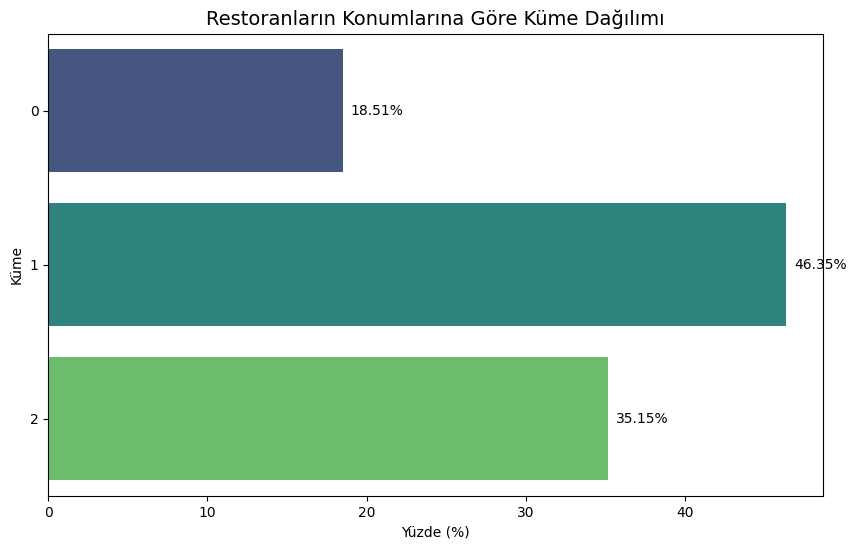

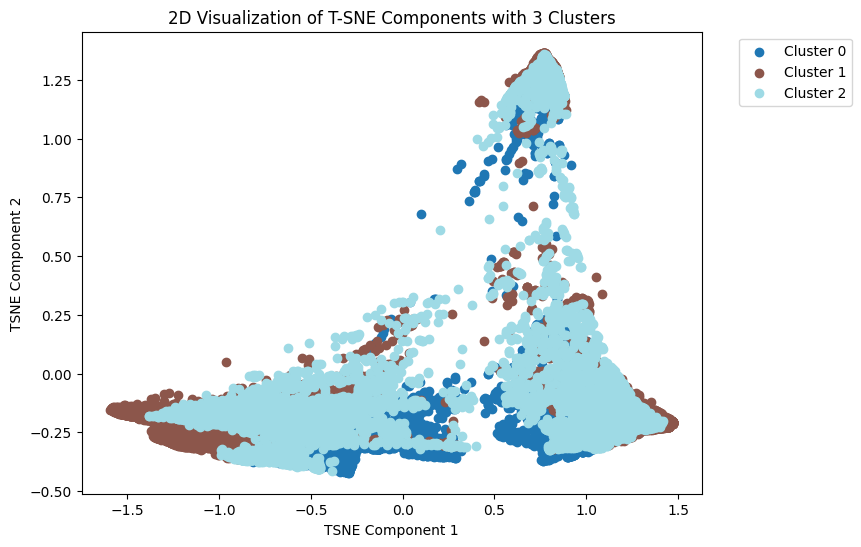

In [89]:
# KMeans modelini oluşturma 
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df_en_clean['cluster_label'] = kmeans.fit_predict(df_en_clean[['location']])

# Her bir küme için yüzdesel dağılımı hesaplama
cluster_percentage = (df_en_clean['cluster_label'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Müşteri dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, palette='viridis', orient='h')

for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.title('Restoranların Konumlarına Göre Küme Dağılımı', fontsize=14)
plt.xlabel('Yüzde (%)')
plt.ylabel('Küme')
plt.legend().set_visible(False)
plt.show()

# T-SNE dönüşümü sonrası iki boyutlu görselleştirme
plt.figure(figsize=(8, 6))

colors = plt.cm.tab20(np.linspace(0, 1, optimal_k)) 

# Her küme için scatter plot çizme
for cluster in range(optimal_k):
    cluster_data = df_tsne[kmeans.labels_ == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}', color=colors[cluster])

plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('2D Visualization of T-SNE Components with {} Clusters'.format(optimal_k))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

> **KMeans algoritması, location bilgilerini kullanarak her veri noktasını belirlenen küme sayısına (bu örnekte optimal_k, yani 3) ayırır. Sonuçta, her bir veri noktasına ait bir küme etiketi (cluster_label) elde edildi. Her bir kümenin veri kümesindeki yüzde dağılımı hesaplandı ve barplot ile görselleştirildi. t-SNE dönüşümünden elde edilen 2D verilerde, her bir küme renklerle ayrılarak scatter plot üzerinde gösterildi.**

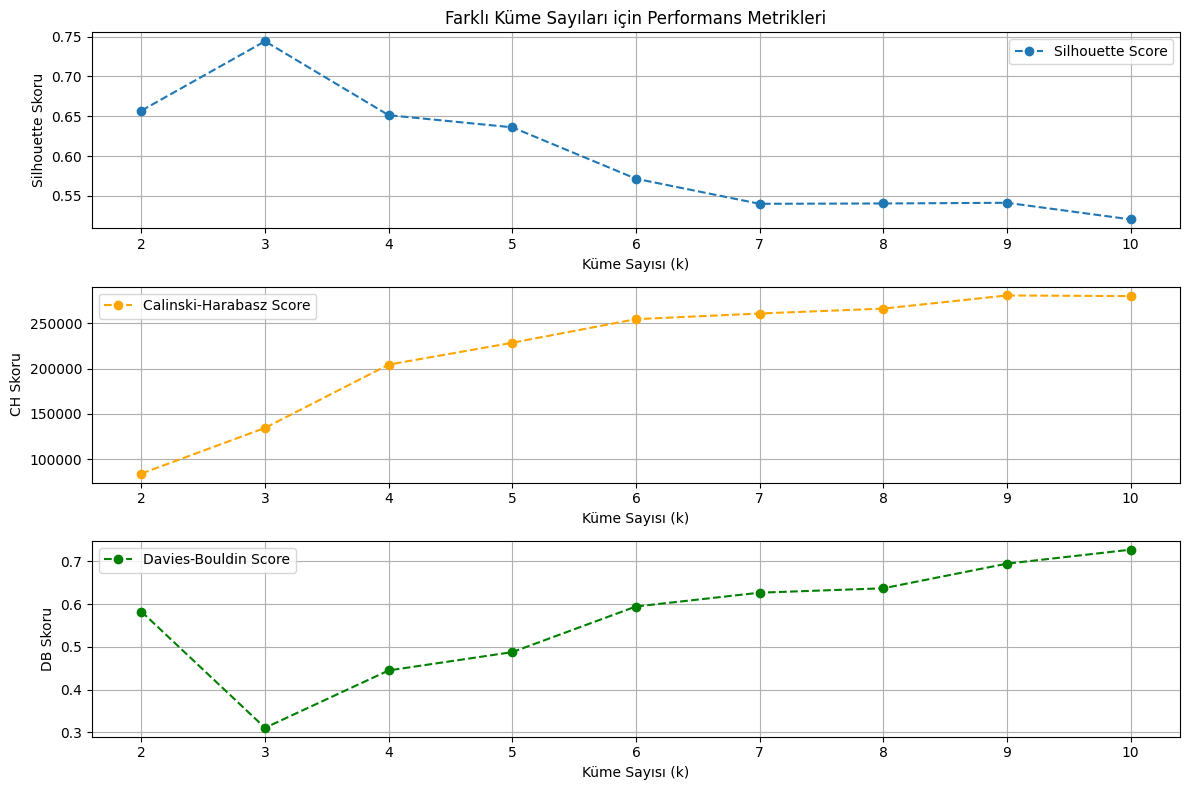

In [90]:
# Küme sayısı için denenecek aralık
min_k = 2
max_k = 10

# Metrik değerlerini depolamak için boş listeler oluşturma
sil_scores = []
ch_scores = []
db_scores = []

# Her bir küme sayısı için metrikleri hesaplama
for k in range(min_k, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
    kmeans.fit(df_tsne)
    labels = kmeans.labels_

    # Siluet skoru hesaplama
    sil_avg = silhouette_score(df_tsne, labels)
    sil_scores.append(sil_avg)

    # Calinski-Harabasz skoru hesaplama
    ch_score = calinski_harabasz_score(df_tsne, labels)
    ch_scores.append(ch_score)

    # Davies-Bouldin skoru hesaplama
    db_score = davies_bouldin_score(df_tsne, labels)
    db_scores.append(db_score)

# Metrik skorlarını görselleştirme
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(range(min_k, max_k + 1), sil_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Silhouette Skoru')
plt.title('Farklı Küme Sayıları için Performans Metrikleri')
plt.xticks(range(min_k, max_k + 1))
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(range(min_k, max_k + 1), ch_scores, marker='o', linestyle='--', color='orange', label='Calinski-Harabasz Score')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('CH Skoru')
plt.xticks(range(min_k, max_k + 1))
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(range(min_k, max_k + 1), db_scores, marker='o', linestyle='--', color='green', label='Davies-Bouldin Score')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('DB Skoru')
plt.xticks(range(min_k, max_k + 1))
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

> **Çeşitli küme sayıları için KMeans algoritmasının performansını değerlendiren üç farklı metrik hesaplandı ve görselleştirildi. Silhouette skoru, Calinski-Harabasz skoru ve Davies-Bouldin skoru kullanılarak farklı küme sayılarının kümeleme kalitesine etkisi analiz edildi. Silhouette skoru 1 değerine ne kadar yakınsa o kadar iyi, Davies-Bouldin ise 1 değerinden ne kadar düşükse (örn 0.5, 0.6dan çok daha iyi bir kümeleme) daha iyi bir kümeleme yapılmış demektir.. Calinski-Harabasz için ise daha yüksek değerler daha iyi kümeleme anlamına gelir. Grafiklere bakıldığında db, silhoutte için optimal düzeyde kümeleme k=3 için olduğu görülmektedir. ch için ise k=9 ve k=10 noktalarında başarılı bir kümeleme görülmektedir..**

In [91]:
# Küme sayısı için belirli bir k
k = 3

# KMeans modelini k=3 için oluşturma ve fit etme
kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
kmeans.fit(df_tsne)
labels = kmeans.labels_

# Silhouette skorunu hesaplama
sil_score = silhouette_score(df_tsne, labels)
print(f"Silhouette Skoru: {sil_score:.4f}")

# Calinski-Harabasz skorunu hesaplama
ch_score= calinski_harabasz_score(df_tsne, labels)
print(f"Calinski-Harabasz Skoru: {ch_score:.4f}")

# Davies-Bouldin skorunu hesaplama
db_score = davies_bouldin_score(df_tsne, labels)
print(f"Davies-Bouldin Skoru: {db_score:.4f}")


Silhouette Skoru: 0.7442
Calinski-Harabasz Skoru: 134550.5495
Davies-Bouldin Skoru: 0.3108


> **K= 3 için KMeans kümeleme algoritmasının performansını değerlendirmek amacıyla çeşitli metrikleri hesaplar ve sonuçları yazdırıldı.**

# GENEL ÇIKARIM


1.  Gereksiz sütunlar veri setinden çıkarıldı. Bu sütunlar bize modelleme aşamasında bilgi vermeyeceği ve modellememize etki etmeyeceği için veri setinden bu sütunlar çıkarıldı.
2.  Nan değerine sahip veriler veri setinden çıkarıldı. Bu aşamada mode, median, mean gibi birçok yöntem denendi. Ve model en iyi sonucu bu değerlerin veri setinden çıkarılması ile verdi.
3.  Modelleme aşamasına geçmeden önce tüm verilerimizin numeric olması gerekmektedir. Bu nedenle encoder yöntemi ile tüm verilerimiz mumeric tipe  dönüştürüldü.
4. Bu notebookta denetimsiz öğrenme modelleriyle çalışıldı. Bu nedenle aykırı değerler için de bu yöntem ele alındı. Aykırı değerler denetimsiz öğrenme yöntemi olan LOF ile incelendi, veri setinden çıkarıldı. Bu aşamada parametre optimizasyonu yapıldı.. Örn; 
lof --> (n_neighbors=10, contamination=0.15) Silhouette Skoru: 0.7311
Calinski-Harabasz Skoru: 121889.3455
Davies-Bouldin Skoru: 0.3255.. Farklar az olsa bile en başarılı spnuç için parametrelerle oynamak gerekmektedir..
5. Kümeleme algoritmaları, veri noktalarının birbirine olan uzaklıklarına göre kümeler oluşturduğundan, ölçeklendirilmiş veriler daha doğru kümeler oluşturulmasına yardımcı olur.. Verilerimiz bu nedenle Standardizasyon işleminden geçirildi.
6. Boyutsal azaltma, veri setindeki gereksiz veya gürültülü bilgileri ortadan kaldırır ve kümeleme algoritmalarını daha verimli hale getirir. Çünkü çok boyutlu verilerle çalışmaktansa bizim için gerekli bir veri kümesi oluşturmuş olur bu da modelleme sürecimizi optimize etmek için özellikle çok boyutlu verilerde kullanılması gerekli bir adımdır. Bu amaçla kümele aşamasına geçmeden önce bu aşama uygulandı. Burada  çok bilinen yöntemlerden pca ve tsne denendi ve tsne modeli çok daha başarılı hale getirdiği için bu teknik ile devam edildi.. Örn; 

aynı parametrelerde pca -->Silhouette Skoru: 0.1497,
Calinski-Harabasz Skoru: 3595.1262,
Davies-Bouldin Skoru: 1.9247  başarı oranları verirken

tsne--> (n_neighbors=10, contamination=0.15) Silhouette Skoru: 0.7311
Calinski-Harabasz Skoru: 121889.3455
Davies-Bouldin Skoru: 0.3255 başarı oranları vermiştir... Bu nedenle tsne ele alınarak, parametreler optimize edilmeye devam edilmiştir..

Onun dışında birçok tsne ve lof parametresi denenmiş en başarılı sonuç--> Silhouette Skoru: 0.7442
Calinski-Harabasz Skoru: 134550.5495
Davies-Bouldin Skoru: 0.3108
tsne-->(n_components=2, perplexity=300, n_iter=250, learning_rate=20, random_state=42) ve lof --> (n_neighbors=30, contamination=0.15) almıştır.. 
Tsne için örnek--> (n_components=3, perplexity=30, n_iter=250, learning_rate=200, random_state=36) için sonuç--> Silhouette Skoru: 0.5072,
Calinski-Harabasz Skoru: 37541.9612,
Davies-Bouldin Skoru:0.7373  gibi daha düşük başarı oranları almıştır..

7. Daha sonra Kümeleme aşamasına geçildi. Bu aşamada öncelikle elbow ve silhoutte indekslerle optimize k noktası belirlendi. Alınan sonuçlara göre geri dönülüp bir çok aşamada kullanılan hiperparametreler optimize edilip ortalamanın oldukça üstünde sonuçlar elde edildi.

* Elde edilen sonuçları gözden geçirecek olursak:

 k=3 için;
Silhouette Skoru: 0.7442
Calinski-Harabasz Skoru: 134550.5495
Davies-Bouldin Skoru: 0.3108
 Bu sonuçları yorumlayacak olursa silhoutte oranı 0.7442 ile 1 değerine oldukça yakın ve yüksek silüet skoru sahip, db skoru ise 1'İN oldukça altında olup 0'a çok daha yakın, cb skoru ise 134550.5495 yüksek bir orana sahip. Buradan şunu söyleyebiliriz ki oldukça başarılı bir kümeleme aşaması gerçekleştirildi.
*  GÖRSELLEŞTİRME:
Kümeleri görselleştirdiğimizde, kümelerimizin iç içe geçtiğini görüyoruz. Bu iç içe geçişler, bazen veri setinden kaynaklanıyor olabilmektedir. Nitekim projemize bakınca restoranların coğrafi olarak birbirine yakın yerlerde bulunması ve bazı benzer özelliklere sahip olmalarından kaynaklanmaktadır. Özellikle, bazı kümeler birbirine çok yakın konumlara sahip restoranları içeriyor ve bu durum, kümeler arasında belirgin bir ayrım yapılmasını zorlaştırıyor. Bu iç içe geçmiş kümeler, restoranların benzer coğrafi bölgelerde bulunmasının ve hizmet özelliklerinin örtüşmesinin bir sonucudur. Aykırı değer tespiti, boyutsal azaltma ve manuel parametre optimizasyonu ile bu iç içe geçişlerin etkileri en aza indirilmeye çalışılmıştır.